### **Question 1**

In [1]:
# Step 1. Import the necessary libraries
import pandas as pd
import seaborn
import numpy as np

In [2]:
# Step 3. Assign it to a variable called users
users = pd.read_csv('u.user', sep = '|', engine = 'python')

In [3]:
# Step 4. Discover what is the mean age per occupation
pd.pivot_table(users, 'age', 'occupation')

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [4]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
male_ratio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
sums = male_ratio[['F', 'M']].sum(axis=1)
male_ratio['MaleRatio'] = round(100 * male_ratio['M'] / sums , 1)
male = pd.DataFrame(male_ratio['MaleRatio'])
male.sort_values('MaleRatio',ascending=False)

,MaleRatio
occupation,
doctor,100.0
engineer,97.0
technician,96.3
retired,92.9
programmer,90.9
executive,90.6
scientist,90.3
entertainment,88.9
lawyer,83.3


In [5]:
# Step 6. For each occupation, calculate the minimum and maximum ages
ages = pd.pivot_table(users, 'age', 'occupation', aggfunc=[np.min, np.max])
ages

,amin,amax
,age,age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62


In [6]:
# Step 7. For each combination of occupation and sex, calculate the mean age
pd.pivot_table(users, 'age', ['occupation', 'gender'], aggfunc='mean').round(2)

age
occupation    gender       
administrator F       40.64
              M       37.16
artist        F       30.31
              M       32.33
doctor        M       43.57
educator      F       39.12
              M       43.10
engineer      F       29.50
              M       36.60
entertainment F       31.00
              M       29.00
executive     F       44.00
              M       38.17
healthcare    F       39.82
              M       45.40
homemaker     F       34.17
              M       23.00
lawyer        F       39.50
              M       36.20
librarian     F       40.00
              M       40.00
marketing     F       37.20
              M       37.88
none          F       36.50
              M       18.60
other         F       35.47
              M       34.03
programmer    F       32.17
              M       33.22
retired       F       70.00
              M       62.54
salesman      F       27.00
              M       38.56
scientist     F       28.33
              M       36.32
student       F       20.75
              M       22.67
technician    F       38.00
              M       32.96
writer        F       37.63
              M       35.35

In [7]:
# Step 8. For each occupation present the percentage of women and men
x=users.groupby(['occupation','gender'])['gender'].count()
y=users.groupby(['occupation'])['gender'].count()
r=pd.DataFrame(((x/y)*100).round(2))
r

gender
occupation    gender        
administrator F        45.57
              M        54.43
artist        F        46.43
              M        53.57
doctor        M       100.00
educator      F        27.37
              M        72.63
engineer      F         2.99
              M        97.01
entertainment F        11.11
              M        88.89
executive     F         9.38
              M        90.62
healthcare    F        68.75
              M        31.25
homemaker     F        85.71
              M        14.29
lawyer        F        16.67
              M        83.33
librarian     F        56.86
              M        43.14
marketing     F        38.46
              M        61.54
none          F        44.44
              M        55.56
other         F        34.29
              M        65.71
programmer    F         9.09
              M        90.91
retired       F         7.14
              M        92.86
salesman      F        25.00
              M        75.00
scientist     F         9.68
              M        90.32
student       F        30.61
              M        69.39
technician    F         3.70
              M        96.30
writer        F        42.22
              M        57.78

### **Question 2**

In [8]:
# Step 1. Import the necessary libraries
import pandas as pd
import seaborn
import numpy as np

In [9]:
# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('Euro_2012')

In [10]:
# Step 4. Select only the Goal column
pd.DataFrame(euro12['Goals'])

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [11]:
# Step 5. How many team participated in the Euro2012?
euro12['Team'].count()

16

In [12]:
# Step 6. What is the number of columns in the dataset?
len(euro12.columns)

35

In [13]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = pd.DataFrame(euro12[['Team', 'Yellow Cards', 'Red Cards']])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(['Red Cards', 'Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [15]:
# Step 9. Calculate the mean Yellow Cards given per Team
pd.pivot_table(euro12, 'Yellow Cards', 'Team', aggfunc='mean')

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


In [16]:
# Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals']> 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
# Step 11. Select the teams that start with G
euro12.loc[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [18]:
# Step 12. Select the first 7 columns
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, 0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [20]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
Teams = ('England', 'Italy', 'Russia')
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### **Question 3**

In [1]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
a = pd.Series(np.random.randint(1,5,100))
a        

0     1
1     1
2     1
3     3
4     3
     ..
95    1
96    1
97    2
98    3
99    4
Length: 100, dtype: int32

In [3]:
# • The second a random number from 1 to 3
b = pd.Series(np.random.randint(1,4,100))
b

0     3
1     3
2     2
3     3
4     3
     ..
95    3
96    1
97    3
98    3
99    2
Length: 100, dtype: int32

In [4]:
# • The third a random number from 10,000 to 30,000
c = pd.Series(np.random.randint(10000,30000,100))
c

0     25416
1     13846
2     28813
3     14482
4     11167
      ...  
95    16447
96    26228
97    14268
98    19641
99    16713
Length: 100, dtype: int32

In [5]:
# Step 3. Create a DataFrame by joinning the Series by column
a1 = pd.DataFrame(a)
b1 = pd.DataFrame(b)
c1 =pd.DataFrame(c)
d = pd.merge(a1, b1, left_index = True, right_index = True)
Frame = pd.merge(d, c1, left_index = True, right_index = True)
Frame

,0_x,0_y,0
0,1,3,25416
1,1,3,13846
2,1,2,28813
3,3,3,14482
4,3,3,11167
...,...,...,...
95,1,3,16447
96,1,1,26228
97,2,3,14268
98,3,3,19641


In [6]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
Frame.head()

,bedrs,bathrs,price_sqr_meter
0,1,3,25416
1,1,3,13846
2,1,2,28813
3,3,3,14482
4,3,3,11167


In [7]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = Frame.stack()

In [8]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn

0   bedrs                  1
    bathrs                 3
    price_sqr_meter    25416
1   bedrs                  1
    bathrs                 3
                       ...  
98  bathrs                 3
    price_sqr_meter    19641
99  bedrs                  4
    bathrs                 2
    price_sqr_meter    16713
Length: 300, dtype: int32

#### It is true, the new dataframe only goes until index 99 ####

In [9]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index()

,level_0,level_1,0
0,0,bedrs,1
1,0,bathrs,3
2,0,price_sqr_meter,25416
3,1,bedrs,1
4,1,bathrs,3
...,...,...,...
295,98,bathrs,3
296,98,price_sqr_meter,19641
297,99,bedrs,4
298,99,bathrs,2


### **Question 4**

In [10]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [16]:
# Step 2. Import the dataset from this address
data = pd.read_fwf('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', header=1)

In [17]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data["Date"] = data["Yr"].astype(str) + '-' + data["Mo"].astype(str) + '-' + data["Dy"].astype(str) 
data['Date'] = pd.to_datetime(data['Date'])
del data['Yr']
del data['Mo']
del data['Dy']
# We are going to do Step 4, before turn Date into the Index

In [18]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it
import datetime

def fix_date(x):

    if x.year > 1980:

        year = x.year - 100

    else:

        year = x.year

    return datetime.date(year,x.month,x.day)


data.Date = data.Date.apply(fix_date)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [19]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Index = pd.DatetimeIndex(data['Date'])
Index
data = data.set_index(Index)
del data['Date']
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [20]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [21]:
# Step 7. Compute how many non-missing values there are in total.
data.count().sum() - data.isnull().sum().sum()

78826

In [22]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean().mean()

10.227982360836924

In [24]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean indspeeds and standard deviations of the windspeeds at each location over all the ays
loc_stats = round(pd.DataFrame({'Min': data.min(), 'Max': data.max(), 'Mean': data.mean(), 'Std.Deviation': data.std()}),2)
loc_stats

,Min,Max,Mean,Std.Deviation
RPT,0.67,35.80,12.36,5.62
VAL,0.21,33.37,10.64,5.27
ROS,1.50,33.84,11.66,5.01
KIL,0.00,28.46,6.31,3.61
SHA,0.13,37.54,10.46,4.94
BIR,0.00,26.16,7.09,3.97
DUB,0.00,30.37,9.80,4.98
CLA,0.00,31.08,8.50,4.50
MUL,0.00,25.88,8.49,4.17
CLO,0.04,28.21,8.71,4.50


In [25]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day
day_stats = round(pd.DataFrame({'Min': data.min(axis=1), 'Max': data.max(axis=1), 'Mean': data.mean(axis=1), 'Std. Deviation': data.std(axis=1)}),2)
day_stats

,Min,Max,Mean,Std. Deviation
Date,,,,
1961-01-01,9.29,18.50,13.02,2.81
1961-01-02,6.50,17.54,11.34,3.19
1961-01-03,6.17,18.50,11.64,3.68
1961-01-04,1.79,11.75,6.62,3.20
1961-01-05,6.17,13.33,10.63,2.45
...,...,...,...,...
1978-12-27,8.08,40.08,16.71,7.87
1978-12-28,5.00,41.46,15.15,9.69
1978-12-29,8.71,29.58,14.89,5.76


In [26]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January
round(data.loc[data.index.month== 1].mean(),2)

RPT    14.85
VAL    12.91
ROS    13.30
KIL     7.20
SHA    11.67
BIR     8.05
DUB    11.82
CLA     9.51
MUL     9.54
CLO    10.05
BEL    14.55
MAL    18.03
dtype: float64

In [27]:
# Step 12. Downsample the record to a yearly frequency for each location.
round(data.groupby(data.index.year).mean(),2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.30,10.35,11.36,6.96,10.88,7.73,9.73,8.86,8.65,9.84,13.50,13.68
1962,12.25,10.11,11.73,6.96,10.66,7.39,11.02,8.79,8.32,9.68,12.93,14.32
1963,12.81,10.84,12.54,7.33,11.72,8.43,11.08,10.34,8.90,10.22,13.64,15.00
1964,12.36,10.92,12.10,6.79,11.45,7.57,10.26,9.47,7.79,10.21,13.74,14.91
1965,12.45,11.08,11.85,6.86,11.02,7.48,10.62,8.88,7.91,9.92,12.96,15.59
1966,13.46,11.56,12.02,7.35,11.81,7.79,10.58,8.84,8.51,9.77,14.27,16.31
1967,12.74,10.99,11.74,7.14,11.63,7.37,10.65,9.33,8.65,9.55,14.77,17.14
1968,11.84,10.47,11.41,6.48,10.76,6.07,8.86,8.26,7.22,7.83,12.81,15.02
1969,11.17,9.72,10.90,5.77,9.87,6.19,8.56,7.71,7.92,7.75,12.62,15.76


In [28]:
# Step 13. Downsample the record to a monthly frequency for each location.
round(data.resample('M').mean(),2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.84,11.99,13.43,7.74,11.07,8.59,11.18,9.25,9.09,10.11,13.88,14.70
1961-02-28,16.27,14.98,14.44,9.23,13.85,10.94,11.89,11.85,11.82,12.71,18.58,15.41
1961-03-31,10.89,11.30,10.75,7.28,10.51,8.87,9.64,9.83,10.29,11.25,16.41,15.72
1961-04-30,10.72,9.43,10.00,5.83,8.43,6.49,6.93,7.09,7.34,7.24,11.15,10.28
1961-05-31,9.86,8.85,10.82,5.91,9.49,6.57,7.60,8.18,8.04,8.50,11.90,12.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.65,8.26,9.03,4.50,7.37,5.94,5.65,5.42,7.24,5.54,10.47,12.05
1978-09-30,10.91,10.89,10.64,5.72,10.37,9.28,10.79,9.58,10.07,8.94,15.68,19.39
1978-10-31,9.90,8.67,9.30,4.72,8.53,6.77,8.12,7.34,8.30,8.24,13.78,17.15


In [29]:
# Step 14. Downsample the record to a weekly frequency for each location.
round(data.resample('W').mean(),2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,13.54,11.49,10.49,6.42,9.47,6.44,11.06,6.62,8.43,8.50,12.48,13.24
1961-01-15,12.47,8.97,11.96,4.63,7.35,5.07,7.54,6.82,5.71,7.57,11.13,11.02
1961-01-22,13.20,9.86,12.98,6.33,8.97,7.42,9.26,7.88,7.15,8.12,9.82,11.43
1961-01-29,19.88,16.14,18.23,12.72,17.43,14.83,15.53,15.16,14.48,15.64,20.93,22.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.93,11.23,13.94,5.57,10.22,8.62,9.64,7.69,9.01,9.55,11.84,18.73
1978-12-10,20.74,19.19,17.03,9.78,15.29,12.77,14.44,12.49,13.87,14.08,18.52,23.06
1978-12-17,16.76,14.69,14.99,6.92,11.40,7.27,10.21,7.97,9.17,8.57,11.10,15.56


In [30]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
Weekly_data = data['1961-01-02':].resample('W').mean()
round(pd.DataFrame({'Min': Weekly_data.min(axis=1), 'Max': Weekly_data.max(axis=1), 'Mean': Weekly_data.mean(axis=1), 'Std. Deviation': Weekly_data.std(axis=1)}),2)

,Min,Max,Mean,Std. Deviation
Date,,,,
1961-01-08,6.42,13.54,9.85,2.60
1961-01-15,4.63,12.47,8.35,2.72
1961-01-22,6.33,13.20,9.37,2.22
1961-01-29,12.72,22.53,16.96,2.92
1961-02-05,8.25,16.83,11.80,2.81
...,...,...,...,...
1978-12-03,5.57,18.73,10.91,3.56
1978-12-10,9.78,23.06,15.94,3.84
1978-12-17,6.92,16.76,11.22,3.47


### **Question 5**

In [31]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [49]:
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [33]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [34]:
# Step 4. See the first 10 entries
chipo.iloc[0:10,0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [36]:
# Step 5. What is the number of observations in the dataset?
len(chipo)

4622

In [37]:
# Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [38]:
# Step 7. Print the name of all the columns.
print(*list(chipo.columns), sep = "\n") 

order_id
quantity
item_name
choice_description
item_price


In [39]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [40]:
# Step 9. Which was the most-ordered item?
chipo.item_name.mode()

0    Chicken Bowl
dtype: object

##### Chicken Bowl is the most ordered item #####

In [41]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby('item_name')['quantity'].sum()['Chicken Bowl']

761

In [42]:
# Step 11. What was the most ordered item in the choice_description column?
chipo.choice_description.mode()

0    [Diet Coke]
dtype: object

##### Diet Coke is the most ordered item in the choice description column #####

In [43]:
# Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

In [44]:
# Step 13.
# • Turn the item price into a float
chipo['item_price'] = (chipo['item_price'].replace( '[\$,)]','', regex=True ).astype(float))
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [45]:
# • Check the item price type
chipo.item_price.dtype

dtype('float64')

In [50]:
# • Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: x.replace('$','')).astype(float)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [51]:
# • Check the item price type
chipo.item_price.dtype

dtype('float64')

In [52]:
# Step 14. How much was the revenue for the period in the dataset?
(chipo.item_price*chipo.quantity).sum()

39237.02

In [53]:
# Step 15. How many orders were made in the period?
chipo.order_id.count()

4622

In [54]:
# Step 16. What is the average revenue amount per order?
round(chipo.item_price.mean(),2)

7.46

In [55]:
# Step 17. How many different items are sold?
len(chipo['item_name'].unique())

50

### **Question 6**

In [57]:
import pandas as pd
import seaborn as sns

In [58]:
marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage = marriage.set_index('Year')
marriage

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1867,357000.0,10000.0,36970000,9.7,0.3
1868,345000.0,10000.0,37885000,9.1,0.3
1869,348000.0,11000.0,38870000,9.0,0.3
1870,352000.0,11000.0,39905000,8.8,0.3
1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...
2007,2197000.0,856000.0,301696000,7.3,2.8
2008,2157000.0,844000.0,304543000,7.1,2.8
2009,2080000.0,840000.0,307240000,6.8,2.7


[Text(0, 0.5, 'Rate per Capita'), Text(0.5, 0, 'Year')]

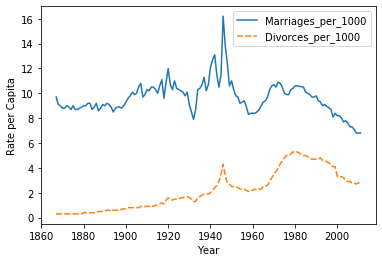

In [59]:
ax = sns.lineplot(data=marriage.drop(['Marriages', 'Divorces', 'Population'], axis=1))
ax.set(xlabel="Year", ylabel = "Rate per Capita")

### **Question 7**

In [60]:
list = [1900, 1950, 2000]
Filter_mar  = marriage[marriage.index.isin(list)]
Filter_mar

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1900,709000.0,56000.0,76094000,9.3,0.7
1950,1667000.0,385000.0,151684000,11.0,2.5
2000,2315000.0,944000.0,282398000,8.2,3.3


[Text(0, 0.5, 'Rate per Capita'), Text(0.5, 0, 'Year')]

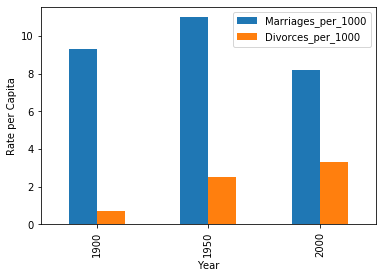

In [61]:
del Filter_mar['Marriages']
del Filter_mar['Divorces']
del Filter_mar['Population']
ax = Filter_mar.plot.bar()
ax.set(xlabel="Year", ylabel = "Rate per Capita")

### **Question 8**

[Text(0, 0.5, 'Actors'), Text(0.5, 0, 'Count of kills')]

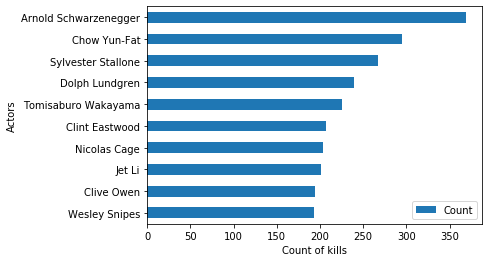

In [62]:
Actors = pd.read_csv('actor_kill_counts.csv')
ax = Actors.sort_values(['Count']).plot.barh(x = 'Actor', y = 'Count')
ax.set(xlabel="Count of kills", ylabel = "Actors")

### **Question 9**

In [63]:
emperors = pd.read_csv('roman-emperor-reigns.csv')

In [64]:
emperors

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


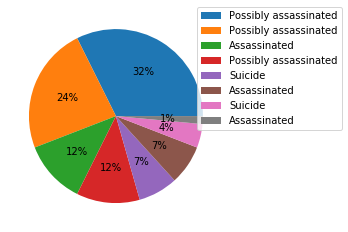

In [65]:
plt.pie(emperors['Cause_of_Death'].value_counts(), labels=['','','','','','','',''], autopct='%1.0f%%')
plt.legend(labels=emperors['Cause_of_Death'], bbox_to_anchor=(0.85,1.025), loc="upper left")

### **Question 10**

In [66]:
arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

In [67]:
arcade

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


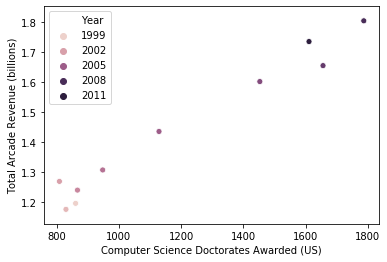

In [68]:
sns.scatterplot(x='Computer Science Doctorates Awarded (US)', y='Total Arcade Revenue (billions)', hue='Year', data=arcade)